# 03 – Exploratory Data Analysis

**Notebook Name:** `03_Exploratory_Data_Analysis.ipynb`

## Objectives
- Compute summary statistics for numeric fields.
- Visualise distribution of `Price` (histogram + KDE, log-scale).
- Plot time trends by Year and Year–Month.
- Compare average prices by County.
- Generate Pearson & Spearman correlation heatmaps.

## Inputs
- `outputs/datasets/collection/HousePricesRecords_clean.csv`

## Outputs
- Histograms, line charts, bar charts, heatmaps
- `Key Insights` summary

## Libraries & Data Load

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_chunk = pd.read_csv("../outputs/datasets/collection/HousePricesRecords_clean.csv")

Descriptive Statistics

In [8]:
df_chunk.describe()

,Price,Old/New,Duration,Year,Month,RegionMedianPrice,RegionSaleCount,CountyMedianPrice,CountySaleCount,LogPrice
count,9.890000e+02,989.000000,989.000000,989.0,989.0,9.890000e+02,989.000000,989.000000,989.000000,989.000000
mean,2.771186e+05,0.008089,0.828109,2017.0,6.0,2.580313e+05,6.397371,243186.240142,21.919110,12.291166
std,2.047842e+05,0.089620,0.377476,0.0,0.0,1.520746e+05,10.408500,108427.704134,19.316969,0.741775
min,1.250000e+03,0.000000,0.000000,2017.0,6.0,1.500000e+04,1.000000,47500.000000,1.000000,7.131699
25%,1.440000e+05,0.000000,1.000000,2017.0,6.0,1.550000e+05,2.000000,160250.000000,10.000000,11.877576
50%,2.300000e+05,0.000000,1.000000,2017.0,6.0,2.295000e+05,3.000000,228475.000000,17.000000,12.345839
75%,3.430000e+05,0.000000,1.000000,2017.0,6.0,3.215000e+05,6.000000,300000.000000,25.000000,12.745489
max,1.560000e+06,1.000000,1.000000,2017.0,6.0,1.195000e+06,49.000000,598750.000000,77.000000,14.260197


## Categorical Value Counts

In [9]:
categorical_cols = ["Old/New", "Duration", "County", "Town/City"]
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_chunk[col].value_counts())


Value counts for Old/New:
Old/New
0    981
1      8
Name: count, dtype: int64

Value counts for Duration:
Duration
1    819
0    170
Name: count, dtype: int64

Value counts for County:
County
GREATER LONDON                  75
KENT                            43
HAMPSHIRE                       39
DEVON                           39
ESSEX                           29
                                ..
MIDDLESBROUGH                    1
BATH AND NORTH EAST SOMERSET     1
BRACKNELL FOREST                 1
BLACKPOOL                        1
ISLE OF ANGLESEY                 1
Name: count, Length: 103, dtype: int64

Value counts for Town/City:
Town/City
LONDON             47
BRISTOL            23
NOTTINGHAM         15
POOLE              12
PLYMOUTH           11
                   ..
FALMOUTH            1
SPALDING            1
BAGSHOT             1
KNEBWORTH           1
BISHOP AUCKLAND     1
Name: count, Length: 435, dtype: int64


## Price Distribution

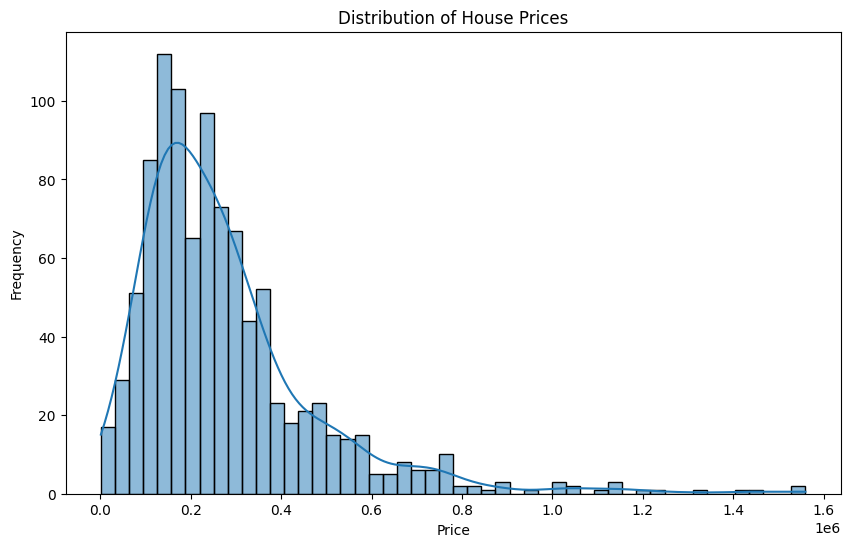

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_chunk['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Time Trends

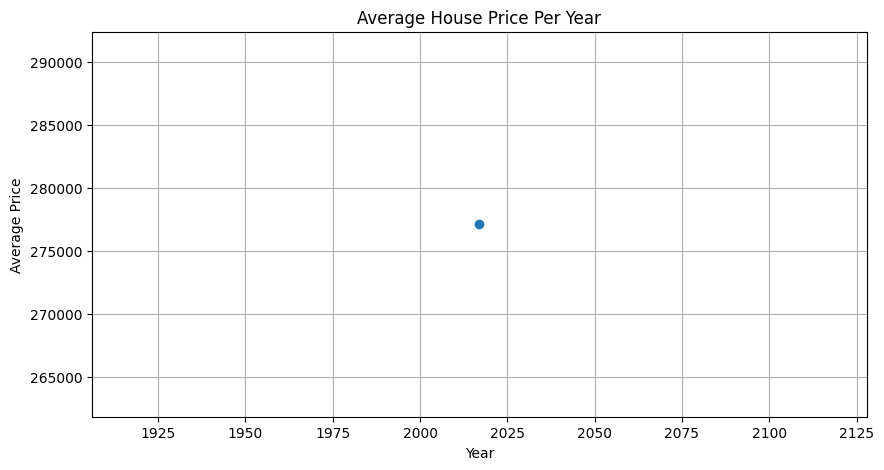

In [11]:
avg_price_year = df_chunk.groupby("Year")['Price'].mean()
avg_price_year.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average House Price Per Year')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.grid(True)
plt.show()

## Section: Numeric Feature Correlation Heatmap



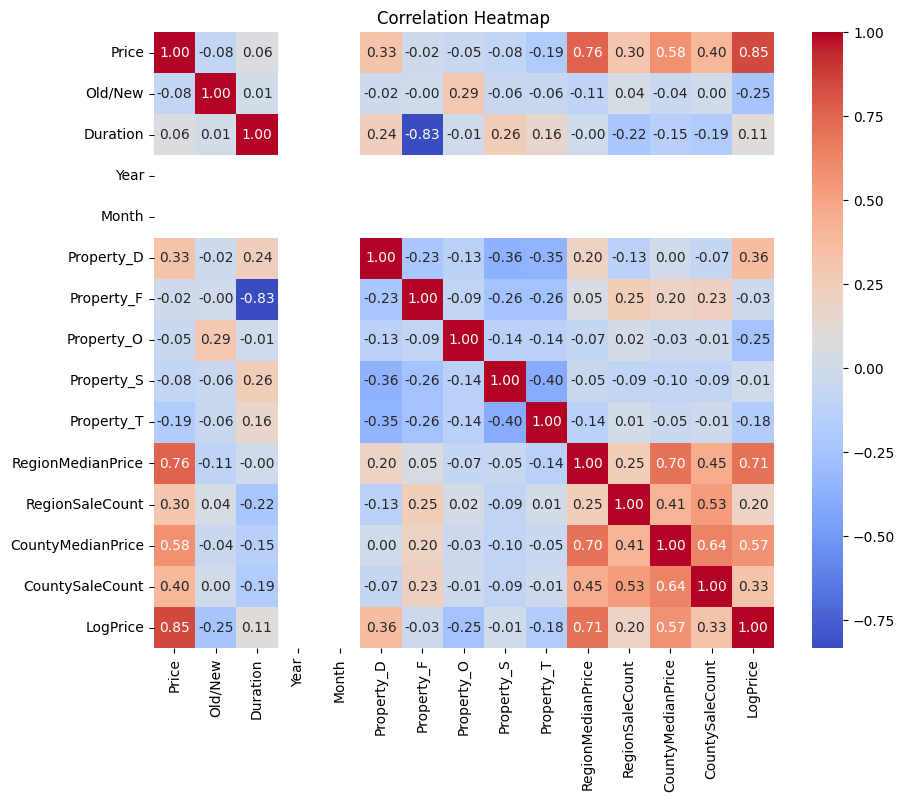

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_chunk.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()